# Following below youtube tutorial

### Youtube video : https://www.youtube.com/watch?v=QIUxPv5PJOY&ab_channel=ComputerScience

### Going to analyse for indian stock : TATA MOTORS


*  It is mentioned in the medium article : https://randerson112358.medium.com/stock-price-prediction-using-python-machine-learning-e82a039ac2bb that it uses Long Short-Term Memory (LSTM)


*  Good video on LSTM : https://www.youtube.com/watch?v=WCUNPb-5EYI&ab_channel=BrandonRohrer


In [8]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
#Get the stock quote 
# we can simply get the name form YAhoo site : https://in.finance.yahoo.com/quote/TATAMOTORS.NS/

df = web.DataReader('TATAMOTORS.NS', data_source='yahoo', start='2012-01-01', end='2020-10-09') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,183.085999,176.903000,179.029999,181.998001,10175802.0,176.684067
2012-01-03,192.733002,184.223999,184.272995,191.891998,15868503.0,186.289169
2012-01-04,200.350998,190.951996,191.792999,199.065002,22752471.0,193.252747
2012-01-05,203.567001,198.074997,198.817001,199.955002,21640779.0,194.116760
2012-01-06,202.824005,196.393005,197.878006,201.438995,13553192.0,195.557434
...,...,...,...,...,...,...
2020-10-05,137.500000,132.050003,136.949997,133.899994,55268322.0,133.899994
2020-10-06,145.800003,136.000000,138.000000,144.750000,161987221.0,144.750000
2020-10-07,144.500000,139.800003,144.250000,141.000000,68273641.0,141.000000


In [12]:
df.shape

(2159, 6)

C:\Users\maluc\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


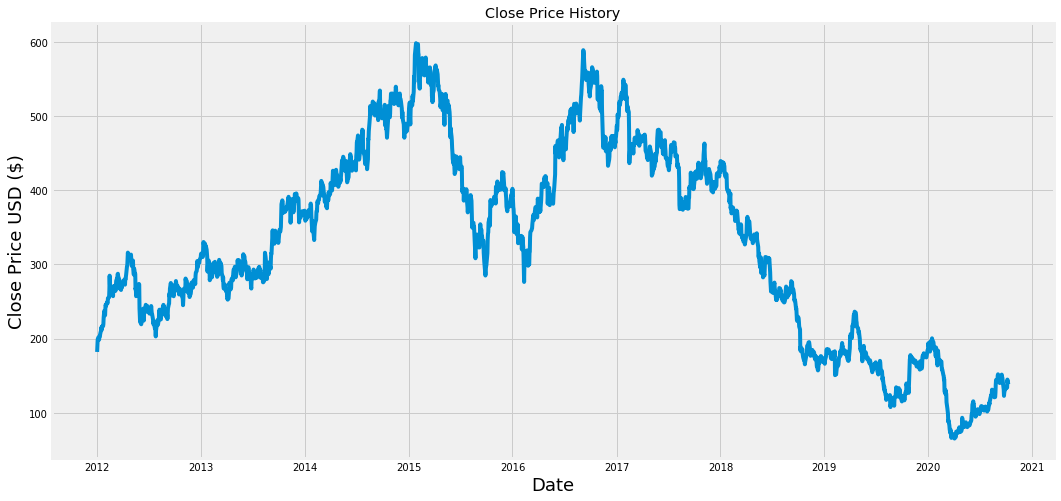

In [13]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [14]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [15]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [16]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [17]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [20]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [21]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1668/1668 [==============================] - 34s 21ms/step - loss: 0.0024


In [23]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [24]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [25]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [26]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [27]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

16.551100773648827

C:\Users\maluc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


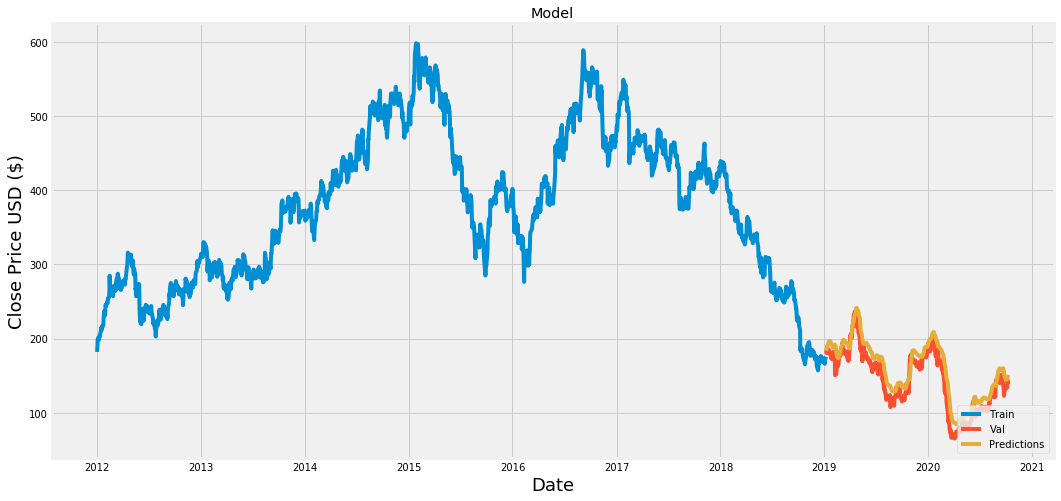

In [28]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [29]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-01-08,179.949997,183.530975
2019-01-09,183.050003,184.996216
2019-01-10,185.750000,187.198120
2019-01-11,180.300003,189.841766
2019-01-14,182.399994,191.608353
...,...,...
2020-10-05,133.899994,144.862228
2020-10-06,144.750000,145.408478
2020-10-07,141.000000,147.402557
